## Heatmap

Implied relationship between color and density of data
* works best for 2 discrete variables
* can add transparency for cases with a lot of data
* sensitive to bin size


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
## Allows to render plots inlie
%matplotlib inline

fuel_econ = pd.read_csv('fuel-econ.csv')

In [35]:
fuel_econ['displ'].describe()
fuel_econ['comb'].describe()
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


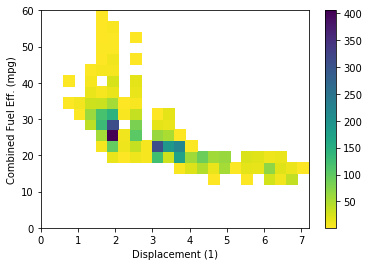

In [16]:

# plt.figure(figsize = [18, 6])

# # PLOT ON LEFT
# plt.subplot(1, 2, 1)
# sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
# plt.xlabel('Displacement (1)')
# plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
# plt.subplot(1, 2, 2)


bins_x = np.arange(0,fuel_econ['displ'].max() + 0.3, 0.3)
bins_y = np.arange(0,fuel_econ['comb'].max() + 3, 3)
plt.hist2d(data = fuel_econ
           , x = 'displ'
           , y = 'comb'
           , cmin = 0.5 ## minimum value to be "counted"
           , cmap = 'viridis_r' ## colormap reversed
           , bins = (bins_x
                     , bins_y)
          ) ## 
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

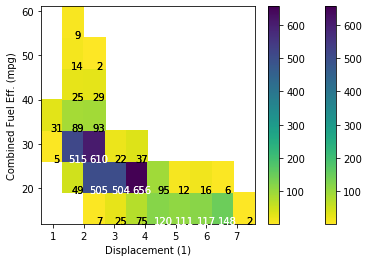

In [20]:
## Adding text annotations per square

# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ
                 , x = 'displ'
                 , y = 'comb'
                 , cmin=0.5
                 , cmap='viridis_r'
                 , bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

In [76]:
## With seaborn
## It needs the data in a wide format

counts = fuel_econ.groupby(['make','fuelType', 'model']).nunique()

# counts.pivot(index='id', columns='make', values='fuelType')
# sb.heatmap(fuel_econ[['make', 'fuelType']].groupby('make').nunique())

id  make  model  year  VClass  \
make  fuelType         model                                                
Acura Premium Gasoline ILX                   9     1      1     6       1   
                       ILX Hybrid            2     1      1     2       1   
                       RLX                   5     1      1     5       1   
                       RLX Hybrid            4     1      1     4       1   
                       TL 2WD                2     1      1     2       1   
...                                         ..   ...    ...   ...     ...   
Volvo Regular Gasoline S60 Inscription AWD   3     1      1     3       1   
                       S60 Inscription FWD   3     1      1     3       1   
                       S60 PoleStar AWD      2     1      1     2       1   
                       S80 AWD               3     1      1     3       1   
                       S80 FWD               4     1      1     4       1   

                                            drive  trans  fuelType  cylinders  \
make  fuelType         model                                                    
Acura Premium Gasoline ILX                      1      4         1          1   
                       ILX Hybrid               1      1         1          1   
                       RLX                      1      2         1          1   
                       RLX Hybrid               1      3         1          1   
                       TL 2WD                   1      1         1          1   
...                                           ...    ...       ...        ...   
Volvo Regular Gasoline S60 Inscription AWD      1      2         1          2   
                       S60 Inscription FWD      1      1         1          1   
                       S60 PoleStar AWD         1      1         1          1   
                       S80 AWD                  1      1         1          1   
                       S80 FWD                  1      2         1          2   

                                            displ  pv2  pv4  city  UCity  \
make  fuelType         model                                               
Acura Premium Gasoline ILX                      2    1    1     4      4   
                       ILX Hybrid               1    1    1     2      2   
                       RLX                      1    1    1     4      4   
                       RLX Hybrid               1    1    1     4      4   
                       TL 2WD                   1    1    1     1      1   
...                                           ...  ...  ...   ...    ...   
Volvo Regular Gasoline S60 Inscription AWD      2    1    1     3      3   
                       S60 Inscription FWD      1    1    1     3      3   
                       S60 PoleStar AWD         1    1    2     2      2   
                       S80 AWD                  1    1    1     2      2   
                       S80 FWD                  2    1    1     4      4   

                                            highway  UHighway  comb  co2  \
make  fuelType         model                                               
Acura Premium Gasoline ILX                        3         3     5    5   
                       ILX Hybrid                 2         2     2    1   
                       RLX                        2         2     4    3   
                       RLX Hybrid                 4         4     4    3   
                       TL 2WD                     1         1     1    1   
...                                             ...       ...   ...  ...   
Volvo Regular Gasoline S60 Inscription AWD        3         3     3    3   
                       S60 Inscription FWD        3         3     3    3   
                       S60 PoleStar AWD           2         2     2    2   
                       S80 AWD                    2         2     2    2   
                       S80 FWD                    4         4     4    4   

          

In [91]:
counts.loc[:,:,'ILX'].reset_index()#.pivot(index="make", columns='fuelType', values='id')

IndexingError: Too many indexers